# **Project Name**

$\color{red}{\text{Zomato Review sentiment analysis}}$

### **Project type** - Regression
### **Contribution** - classification
### **Team Member** - $\color{yellow}{\text{Surya Prakash}}$

# **Project Summary**

**Data Preprocessing** : 

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :** 




**Supervise Machine learning algorithms and implementation :**





**Model explainaibility on Best performing model**

1. performed shap  

2. 

3. 

## Data overview and column description

# **Let's Begin**

## ***Know Your Data***

### **Import Libraries**

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### **Datset Loading**

In [6]:
# Function to load the data 
def DataLoader(path):
    """
    A function to load the datset 
    Argumet - Path(path to the data file)
    return - dataframe
    """
    try:
        dataframe = pd.read_csv(path)
        return dataframe
    except: # if path is incorrect or does not exist
        print("path does not find")

    finally:
        print("operation performed on the  dataset Location")


In [10]:
#store resturant names
names_df = DataLoader('Zomato Restaurant names and Metadata.csv')

operation performed on the  dataset Location


In [13]:
#store resturant reviews
reviews_df = DataLoader('Zomato Restaurant reviews.csv')

operation performed on the  dataset Location


### **Dataset First View**

#### Resturant names dataframe 

In [14]:
names_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


#### Resturant names dataframe

In [15]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [17]:
print(f"the name_df dataset has toltal of  {names_df.shape[0]} rows and {names_df.shape[1]} columns") 

the name_df dataset has toltal of  105 rows and 6 columns


In [18]:
print(f"the reviews_df dataset has toltal of  {reviews_df.shape[0]} rows and {reviews_df.shape[1]} columns") 

the reviews_df dataset has toltal of  10000 rows and 7 columns


### Dataset Information

In [19]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [20]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [21]:
# Dataset Duplicate Value Count
print(f' We have {names_df.duplicated().sum()} duplicate values in the names dataset.')

 We have 0 duplicate values in the names dataset.


In [22]:
# Dataset Duplicate Value Count
print(f' We have {reviews_df.duplicated().sum()} duplicate values in the names dataset.')

 We have 36 duplicate values in the names dataset.


In [ ]:
# Remove duplicated rows
reviews_df = reviews_df.drop_duplicates()

#### Handling missing and nan values

In [24]:
# Missing Values/Null Values Count
names_df.isna().sum().sort_values(ascending=False)

Collections    54
Timings         1
Name            0
Links           0
Cost            0
Cuisines        0
dtype: int64

In [25]:
reviews_df.isna().sum().sort_values(ascending=False)

Review        45
Reviewer      38
Rating        38
Metadata      38
Time          38
Restaurant     0
Pictures       0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

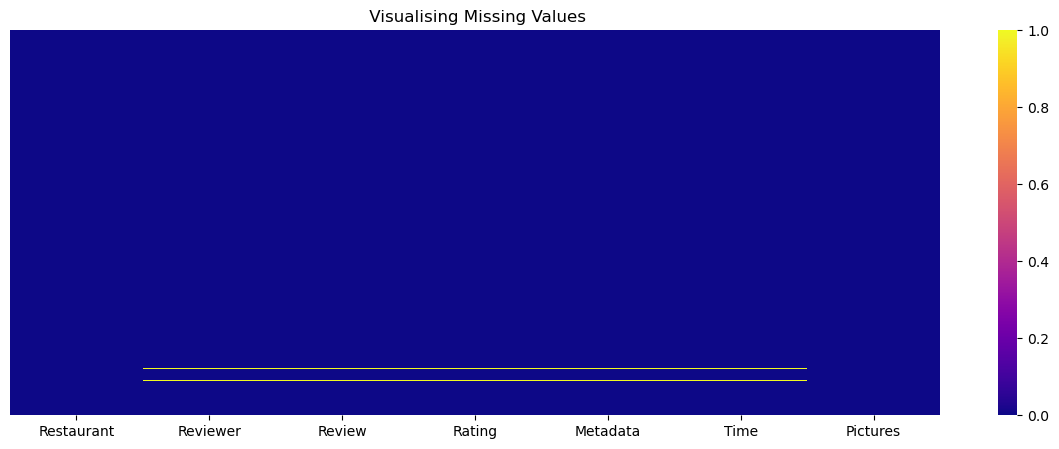

In [26]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(reviews_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

#### Dataframe unique values

In [29]:
#print unique value in categorical value 
#since the dataset is large numerical value whose unique number are less than should be focussed

def print_values(dataframe):
    for i in dataframe.columns.tolist():
        if dataframe[i].dtype=='O':
            print(f"the categorical column {i} have {dataframe[i].nunique()} unique values ")
            if dataframe[i].nunique() <=30 :
                print(f"the unique value in the columns are {dataframe[i].unique()}")
        else:
            print(f"the  numerical column {i} have {dataframe[i].nunique()} unique values ")
            if dataframe[i].nunique() <=30:
                print(f" the unique value in the columns are{dataframe[i].unique()}")

In [30]:
print_values(names_df)

the categorical column Name have 105 unique values 
the categorical column Links have 105 unique values 
the categorical column Cost have 29 unique values 
the unique value in the columns are ['800' '1,300' '1,200' '1,500' '500' '300' '1,000' '350' '400' '1,600'
 '750' '550' '1,900' '450' '150' '1,400' '1,100' '600' '200' '900' '700'
 '1,700' '2,500' '850' '650' '1,800' '2,800' '1,750' '250']
the categorical column Collections have 42 unique values 
the categorical column Cuisines have 92 unique values 
the categorical column Timings have 77 unique values 


In [33]:
print_values(reviews_df)

the categorical column Restaurant have 100 unique values 
the categorical column Reviewer have 7446 unique values 
the categorical column Review have 9364 unique values 
the categorical column Rating have 10 unique values 
the unique value in the columns are ['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]
the categorical column Metadata have 2477 unique values 
the categorical column Time have 9782 unique values 
the  numerical column Pictures have 36 unique values 


## Data wrangling

In [37]:
# Merge the dataframes on the 'name' column
final_df = pd.merge(
    left=reviews_df,           # the first dataframe to merge
    right=names_df,          # the second dataframe to merge
    how='left',        # how to perform the merge, 'inner' keeps only matching rows
    left_on='Restaurant', right_on='Name')
#drop the duplicated column
final_df.drop("Name",axis=1,inplace=True)

In [42]:
#count of rating and their distribution
final_df["Rating"].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

*Most of the customer have given 5 star to the Restaurants on zomato*

In [46]:
final_df.groupby("Rating")["Restaurant"].count().reset_index()

,Rating,Restaurant
0,1,1735
1,1.5,9
2,2,684
3,2.5,19
4,3,1193
5,3.5,47
6,4,2373
7,4.5,69
8,5,3832
9,Like,1


### Removing punctuations

In [53]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [56]:
#Apply the function to each examples
final_df['Review'] = final_df['Review'].fillna('').astype(str).apply(remove_punctuation)

### Removing stopwords

In [58]:
#Extract the st#op words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [60]:
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

#### Function to remove stopwords

In [61]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)